#Exercise 1: Train a classifer to predict the output lable of data in test.csv file.




1.   Write DataLoaders
2.   Train DNN
3.   plot loss values
4.   Show a few samples of the train and test set
5.   provide the labels of the test_set in a file labelled Submission.csv. Submission.cvs should have a column called labels which should contain the labels of all the images




Note: The unpickle code will produce a dict (which have images and labels etc)


Take special care of reading images and make sure the images are indeed correct. You will have to plot the image to see it.

The images have dimensions: (32,32,3)

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import os
import imageio as iio
import matplotlib.pyplot as plt
import torch.optim as optim
import numpy as np
import pandas as pd

In [ ]:
!wget -O data.zip https://www.dropbox.com/s/bcrs90kyytjph42/cifar-10-batches-py.zip?dl=0
!unzip data.zip

--2023-03-28 07:32:27--  https://www.dropbox.com/s/bcrs90kyytjph42/cifar-10-batches-py.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/bcrs90kyytjph42/cifar-10-batches-py.zip [following]
--2023-03-28 07:32:28--  https://www.dropbox.com/s/raw/bcrs90kyytjph42/cifar-10-batches-py.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc02e18bfa81be6113a29cb9ee69.dl-eu.dropboxusercontent.com/cd/0/inline/B5GFRK7K7u9PSii2WkxB96tKNM7GeTqH5tZshL5472Ha6zP5bsu6cbSCejPOAEa4kScDZtpnZJiMD7U8RxsvWKQGV1GyWB1uOiaY0yGa52NH_UA-DeLgEmCBk2RAFX0b1GfDTITznfObEkr6y5XjV7QnkJSEPlaAOYBTbce7sMVoVg/file# [following]
--2023-03-28 07:32:28--  https://uc02e18bfa81be6113a29cb9ee69.dl-eu.dropboxusercontent.com/cd/0/inline/B5GFRK7K7u9PSii2WkxB96tKNM7GeTqH5

In [ ]:
!ls

!ls cifar-10-batches-py

cifar-10-batches-py  data.zip  __MACOSX  sample_data
batches.meta  data_batch_2  data_batch_4  readme.html
data_batch_1  data_batch_3  data_batch_5  test.csv


In [ ]:
#Notice that train data has 5 batches. below code can be used
#to read the train data
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Data Loaders

In [ ]:
class MyCIFAR10Dataset(Dataset):

  def __init__(self,batch_path = "cifar-10-batches-py"):
    self.images = []
    self.labels = []
    for batch_number in range(1,6):
      dict_ = unpickle(f"{batch_path}/data_batch_{batch_number}")
    # data reading
    self.images = dict_[b"data"]
    self.labels = dict_[b"labels"]

  def __len__(self):
    return len(self.labels)

  def __getitem__(self,idx):
    im = self.images[idx,:]
    label = self.labels[idx]
    # convert to images 32 * 32 , first index to be number of channels
    im = np.reshape(im,(3,32,32))
    
    return (im,label)

In [ ]:
class MyDatasetTest(Dataset):
  def __init__(self,path_csv):
    self.data = pd.read_csv(path_csv).to_numpy()
    self.images = self.data[0:,:]
    self.labels = self.data[0,:]


  def __len__(self):
        # number of rows of data
    return self.data.shape[0]

  def __getitem__(self,idx):
    im = self.images[idx,:]
    # convert to images 32 * 32 , first index to be number of channels
    im = np.reshape(im,(3,32,32))/255
    
    return (im)

10000
2


Text(0.5, 1.0, '1')

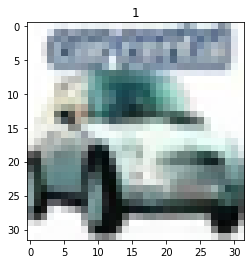

In [ ]:
dataset = MyCIFAR10Dataset()
print(len(dataset))
print(len(dataset[0]))
# dataset [1] labels
# dataset [0] pixels
plt.imshow(dataset[0][0].transpose((1, 2, 0)))
plt.title(dataset[0][1])

torch.Size([64, 3, 32, 32])


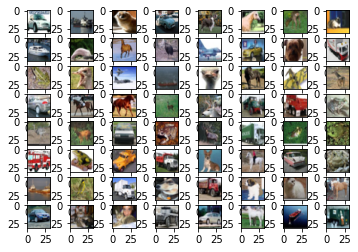

In [ ]:

train_loader = DataLoader(dataset,batch_size = 64)

tl = iter(train_loader)
batch = next (tl)
print(batch[0].shape)
for i in range(64):
  plt.subplot(8,8,i+1)
  plt.imshow(batch[0][i,:,:,:].permute(1, 2, 0))

torch.Size([3, 32, 32])


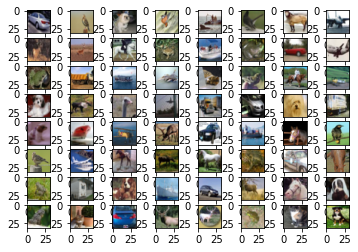

In [ ]:

datasetTest = MyDatasetTest("cifar-10-batches-py/test.csv")
test_loader = DataLoader(datasetTest,batch_size = 64)
tl = iter(test_loader)
batch = next (tl)
print(batch[0].shape)
for i in range(64):
  plt.subplot(8,8,i+1)
  plt.imshow(batch[i][:].permute(1, 2, 0))

In [ ]:

# USE RESNT
# transfer learning - fine tuning

from torchvision.models import resnet18
net = resnet18(pretrained = True)

net.fc = nn.Linear(in_features = 512 , out_features = 10 , bias = True)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Adjusting learning rate of group 0 to 5.0000e-03.
Adjusting learning rate of group 0 to 2.5000e-03.
Adjusting learning rate of group 0 to 1.2500e-03.
Adjusting learning rate of group 0 to 6.2500e-04.
Adjusting learning rate of group 0 to 3.1250e-04.
Adjusting learning rate of group 0 to 1.5625e-04.
Adjusting learning rate of group 0 to 7.8125e-05.
Adjusting learning rate of group 0 to 3.9063e-05.
Adjusting learning rate of group 0 to 1.9531e-05.
Adjusting learning rate of group 0 to 9.7656e-06.


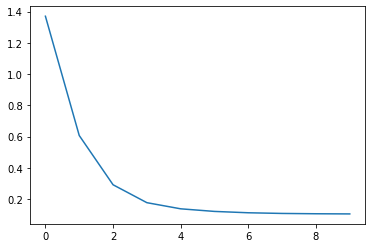

In [ ]:

device = torch.device("cuda:0")
# resnet model
net = net.to(device)

lr = 0.01
mm = 0.5
ls = []
# Optimizer
optimizer = optim.SGD(net.parameters(), lr = lr , momentum = mm)
# Learning rate Scheduler
scheduler = optim.lr_scheduler.ExponentialLR(optimizer , 0.5 , verbose = True)
# iterations
num_epochs = 10                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
ls = []
for i in range(num_epochs):
  total_loss = 0
  for batch in train_loader:
    X, y = batch[0].type(torch.FloatTensor).to(device), batch[1].to(device)
    # predict
    logits = net(X)
    #loss function
    loss = F.cross_entropy(logits,y)
    #set gradients to zero - because pytorch accomulate
    optimizer.zero_grad()
    #calculating the gradients
    loss.backward()
    #Performs a single optimization step
    optimizer.step()
    # .item() extracts the loss’s value as a Python float.
    total_loss +=loss.item()
  scheduler.step()
  ls.append(total_loss/len(train_loader))
plt.plot(ls)


# Test the model On cifar10 test with labels


In [ ]:
from torchvision.datasets import CIFAR10
from torch.utils.data.sampler import SubsetRandomSampler

In [ ]:
#cifar10
def cifar10(batch_sz, path='./datasets'):
    num_classes = 10
    transform_train = transforms.Compose([
                        transforms.RandomHorizontalFlip(),
                        transforms.ToTensor(),
                    ])
    transform_test = transforms.Compose([
                        transforms.ToTensor(),
                    ])

    # Training dataset
    train_data = CIFAR10(root=path, train=True, download=True, transform=transform_train)
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_sz,
                                               shuffle=True, pin_memory=True)

    # Test dataset
    test_data = CIFAR10(root=path, train=False, download=True, transform=transform_test)
    test_loader = torch.utils.data.DataLoader(test_data,
                                              batch_size=batch_sz, shuffle=False, pin_memory=True)

    return train_loader, test_loader


Files already downloaded and verified
Files already downloaded and verified


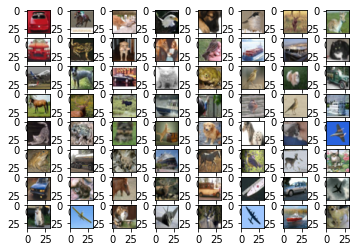

In [ ]:
batch_sz=64 # this is batch size i.e. the number of rows in a batch of data
train_loader, test_loader=cifar10(batch_sz) 
tl = iter(train_loader)
batch = next (tl)
for i in range(64):
  plt.subplot(8,8,i+1)
  plt.imshow(batch[0][i,:,:,:].permute(1, 2, 0))
  

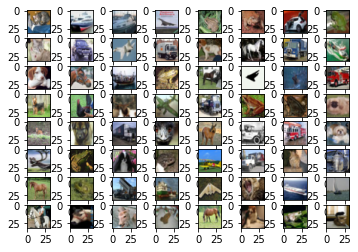

In [ ]:
tl = iter(test_loader)
batch = next (tl)
for i in range(64):
  plt.subplot(8,8,i+1)
  plt.imshow(batch[0][i,:,:,:].permute(1, 2, 0))

In [ ]:
@torch.no_grad()
# function to find model accuracy , using the net and teast features
def test_accuracy(net,test_loader):
  avg_acc = 0
  for batch in test_loader:
    X,y = batch[0].type(torch.FloatTensor).to(device),  batch[1].to(device)
    # calc y hat , predict values using the neural network u built
    logits = net(X)
    #return max of columns
    labels = torch.argmax(logits, axis =1)
    # on rows , divided because we are getting an average
    acc = torch.sum(labels == y , axis = 0)/y.shape[0]
    avg_acc += acc

  print(avg_acc/ len(test_loader))

test_accuracy(net,test_loader)

tensor(0.6753, device='cuda:0')


In [ ]:
datasetTest = MyDatasetTest("cifar-10-batches-py/test.csv")
test_loader2 = DataLoader(datasetTest,batch_size = 64)
pred=[]
for batch in test_loader:
  X = batch[0].type(torch.FloatTensor).to(device)
  # calc y hat , predict values using the neural network u built
  logits = net(X)
  #return max of columns
  labels = torch.argmax(logits, axis =1)
  pred += labels.cpu()

df = pd.DataFrame(np.array(pred), columns=['Class'])
df

,Class
0,3
1,8
2,8
3,0
4,6
...,...
9995,4
9996,3
9997,5
9998,3
